# Assignment from 6th September 2017
* Construct a graph whose vertices are ten subsets of size 2 of the set `{1, 2, 3, 4, 5}`.
Two vertices corresponding to subsets `S` and `T` respectively, are connected by an edge if and only if their intersection is empty.
Construct and display this graph.

In [9]:
from random import choice

L = [1, 2, 3, 4, 5]
V = []; E = []

#Creating the list of Vertices
while len(V) < 10:
    a = choice(L)
    Ltemp = L[:]
    Ltemp.remove(a)
    b = choice(Ltemp)
    tup = (min(a,b),max(a,b))
    if tup not in V:
        V.append(tup)

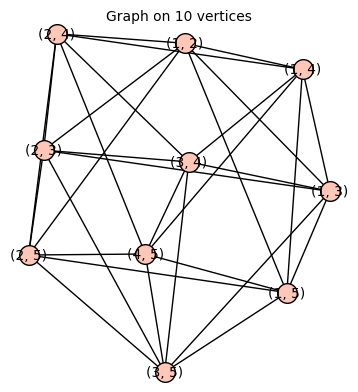

In [10]:
#Creating the list of Edges
for tup1 in V:
    for tup2 in V:
        if tup1 == tup2:
            pass
        elif tup1[0] == tup2[0] or tup1[0] == tup2[1] or tup1[1] == tup2[0] or tup1[1] == tup2[1]:
            edge1 = [tup1, tup2]
            edge2 = [tup2, tup1]
            if edge1 not in E and edge2 not in E:
                E.append(edge1)

G = Graph(E)
G

* Construct the directed graph whose vertices are strings with characters `1` and `2`, and the numbers in these strings add up to an integer less than or equal to `10`. There is an edge from string `t` to string `s` if either:
  1. `s = t + '1'` (i.e., `s` is obtained from `t` by appending a `1` to its right), or
  2. `t = u + '2'`, and there is an edge from `u` to `s`.

To help you with this assignment, I already defined generators for strings of `1` and `2` which add up to a given integer `n` and a Boolean function to determine when there is an edge between strings `s` and `t`.

In [33]:
def words_summing_to(n):
    """
    Generate all the words in letters `1` and `2` which add up to ``n``.
    
    Arg:
    
    `n` - non-negative integer.
    """
    if n == 0:
        yield str()
        raise StopIteration
    elif n == 1:
        yield '1'
        raise StopIteration
    else:
        for s in words_summing_to(n-1):
            yield s + '1'
        for s in words_summing_to(n-2):
            yield s + '2'
            
def is_edge(t, s):
    """
    Return if there is an edge from ``t`` to ``s``.
    """
    return s!='' and (s == t + '1' or (s[-1] == '2' and is_edge(s[:-1], t)))

In [17]:
W = words_summing_to(10)

In [18]:
V = []

for i in range(20):
    V.append(W.next())

In [19]:
G = DiGraph()

for v1 in V:
    for v2 in V:
        if is_edge(v1,v2):
            G.add_edge(v1,v2)

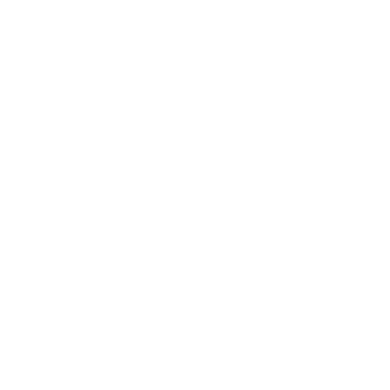

In [20]:
G.plot()